# Cluster analysis of customers data

#### Can we find any groups of customers?
* **To understand our customers better**
* To modify our marketing campaigns
* etc.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Mall_Customers.csv")
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 1 - Preprocessing

### 1.2 - Drop unnecesary columns

We dont need a CustomerID column, `Pandas` provides its own ID for the dataset

In [2]:
df = df.drop("CustomerID", axis = 1)
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### 1.1 -Check if there are missing values

In [3]:
missing_data = df.isnull() # Returns a DataFrame with True/False depending on the existence of a missing value
missing_data.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [5]:
true_counts = [(column, np.count_nonzero(missing_data[column] == True)) for column in missing_data.columns]
false_counts = [(column, np.count_nonzero(missing_data[column] == False)) for column in missing_data.columns]
false_counts

[('Gender', 200),
 ('Age', 200),
 ('Annual Income (k$)', 200),
 ('Spending Score (1-100)', 200)]

## 2 - Exploratory data analysis
Lets get some info about our data, we are specially interested in the spending column and their relationship with the rest

* Univariate analysis
* Bivariate analysis

### 2.1 - Univariate

Lets take a look at the univariate data

#### Gender

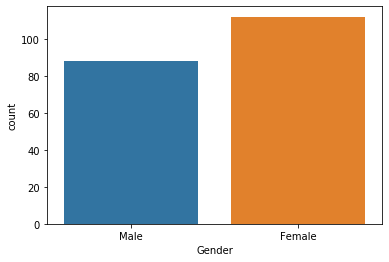

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

x = df["Gender"]

sns.countplot(x);

plt.show()

* Seems that the gender of our customers is balanced.

#### Age

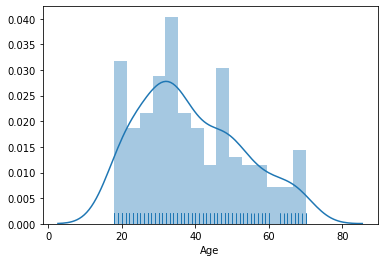

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

x = df["Age"]

sns.distplot(x, bins = 15, rug=True);

plt.show()

In [8]:
df["Age"].median()

36.0

* We have more young people than old people, specially around 20-40

<span style = "color:red">**Note:** KDE assigns probability to 0-18 ages but it may not be possible and thus distort the distribution **visualization**</span>

#### Income

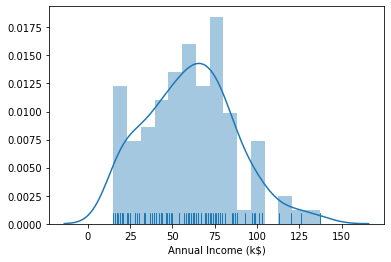

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

x = df["Annual Income (k$)"]

sns.distplot(x, bins = 15, rug=True);

plt.show()

* Our customers mostly earn around 25-75k per year. But there is a 100k group and some outliers

#### Spending

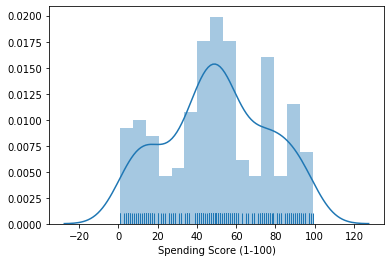

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 4))

x = df["Spending Score (1-100)"]

sns.distplot(x, bins = 15, rug=True);

plt.show()

* It appears that there are 3-4 kinds of spenders:
    * 0-20
    * 40-60
    * 75-80
    * 90-100

### 2.2 - Bivariate

My objective is to analyze the relationships between the variables, specially **<span style= "color:blue">spending**</span> which is one of the most interesting attributes.

<span style="color:red">**Note:** I am not doing a plot on income vs age because I am not that interested in that relationship.</span>

#### Spending vs Income

Text(0.5, 1.0, 'Spending vs Income')

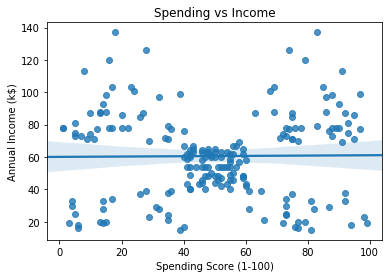

In [15]:
import seaborn as sns

sns.regplot(x=df["Spending Score (1-100)"], y=df["Annual Income (k$)"]).set_title("Spending vs Income")

# A different kind of regplot that allows to group our instances by a categorical variable
#sns.lmplot(x="Spending Score (1-100)", y="Annual Income (k$)", hue="Gender", data = df)

# We could have used a scatterplot, but it lacks the linear regression information
#sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)", hue="Gender", data = df)

* Weak relationship between Income and spending, independent of the gender

#### Spending vs Age

Text(0.5, 1.0, 'Spending vs Age')

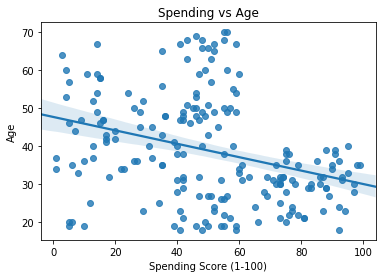

In [16]:
import seaborn as sns

sns.regplot(x=df["Spending Score (1-100)"], y=df["Age"]).set_title("Spending vs Age")
#sns.lmplot(x="Spending Score (1-100)", y="Age", hue="Gender", data = df)

* Some linear relationship between spending and age, which seems to be unaffected by the gender of the customer.

#### Correlation

It will only consider the numeric variables, ignoring the gender.

In [14]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


## 3 - Cluster analysis

Let' see if there are some clusters...

### 3.1 - KMeans independent of gender

In [18]:
df_nogender = df.drop("Gender", axis = 1)
df_nogender.head(3)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6


#### 3.1.1 - Create the KMeans model with some parameters

In [71]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = "random", n_init = 10)

#### 3.1.2 - Give it some data to fit its parameters

In [20]:
kmeans = kmeans.fit(df_nogender)

In [21]:
kmeans.score(df_nogender)

-212840.16982097196

#### 3.1.3 In each group, whats the "center" kind of customer?

In [22]:
kmeans.cluster_centers_

array([[28.95294118, 62.17647059, 73.62352941],
       [46.16521739, 59.36521739, 32.88695652]])

#### 3.1.4 - We can now predict new customers (which group would they belong?)

For example, which group does a person with the following attributes belong  to?

* Age = 30
* Income = 40
* Spending = 15

In [23]:
kmeans.predict([[30, 40, 15]])

array([1])

What if he/she spent more money?

* Age = 30
* Income = 40
* Spending = 75

In [24]:
kmeans.predict([[30, 40, 75]])

array([0])

#### 3.1.5 - cluster analysis

In [28]:
cluster_labels = kmeans.predict(df_nogender)
cluster_labels

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [52]:
df_copy = pd.DataFrame(df_nogender)
df_copy["C"] = cluster_labels
df_copy

,Age,Annual Income (k$),Spending Score (1-100),C
0,19,15,39,1
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,1
...,...,...,...,...
195,35,120,79,0
196,45,126,28,1
197,32,126,74,0
198,32,137,18,1


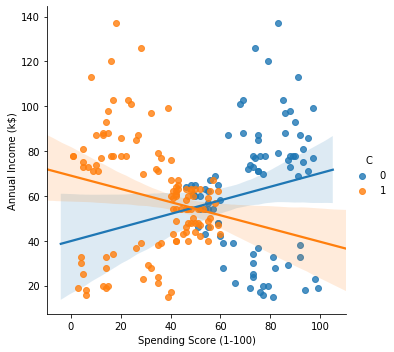

In [72]:
#A different kind of regplot that allows to group our instances by a categorical variable
sns.lmplot(x="Spending Score (1-100)", y="Annual Income (k$)", hue="C", data = df_copy)
#sns.scatterplot(x="Spending Score (1-100)", y="Annual Income (k$)", hue="C", data = df_copy)

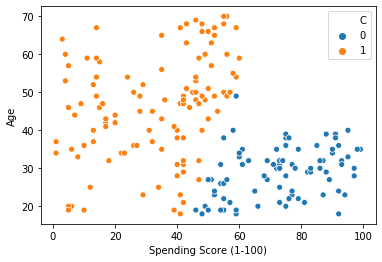

In [73]:
#A different kind of regplot that allows to group our instances by a categorical variable
sns.scatterplot(x="Spending Score (1-100)", y="Age", hue="C", data = df_copy)
#sns.lmplot(x="Spending Score (1-100)", y="Age", hue="C", data = df_copy)

Text(0.5, 0, 'Spending Score (1-100)')

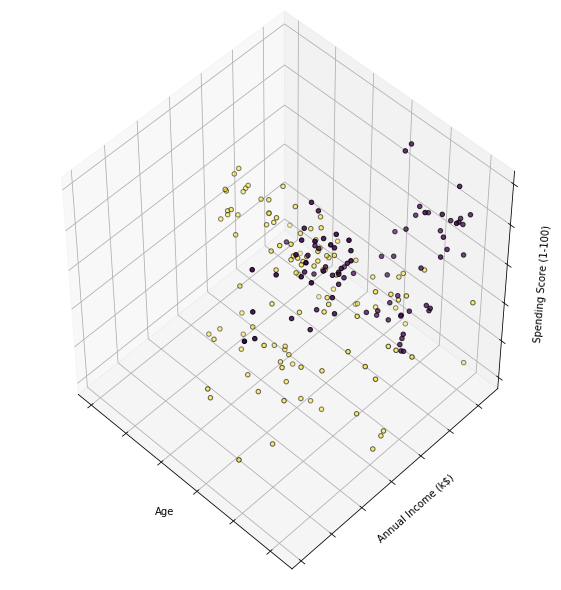

In [70]:
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

labels = df_copy["C"]

ax.scatter(df_copy.loc[:, "Age"], df_copy.loc[:, "Annual Income (k$)"], df_copy.loc[:, "Spending Score (1-100)"],
           c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

In [67]:
colors = []

for i in range(0, len(labels)):
    if label == 0:
        colors.append(10)
    else:
        colors.append(50)

In [ ]:
colors

#### Extra: Choose the number of clusters

In [89]:
from sklearn.cluster import KMeans

models = []
scores = []

for k in range(2, 11): # Range 
    kmeans = KMeans(n_clusters = k, init = "random", n_init = 10).fit(df_nogender)
    models.append(kmeans)
    scores.append(kmeans.score(df_nogender))

In [90]:
scores

[-212840.16982097196,
 -143342.751571706,
 -104366.15145556205,
 -75363.74835182937,
 -58300.44332159071,
 -51118.94993164723,
 -47707.02649333185,
 -40958.87711880708,
 -37432.49073342112]

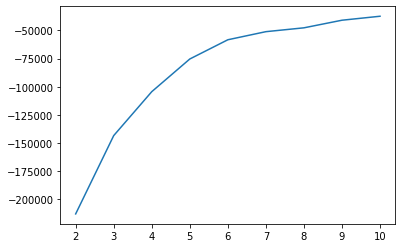

In [91]:
import matplotlib.pyplot as pt

pt.plot(range(2,11), scores)

### 3.2 - Gaussian Mixture Model independent of gender

In [82]:
df_nogender = df_nogender.drop(columns=["C"])

In [83]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 2, n_init = 10)

In [84]:
gmm = gmm.fit(df_nogender)

In [85]:
gmm.predict_proba([[30, 40, 65]])

array([[0.03512701, 0.96487299]])

In [ ]:
gmm.predict_proba([[30, 40, 75]])

In [86]:
gmm.means_

array([[46.77766496, 59.71846342, 33.7540042 ],
       [28.11593844, 61.69944087, 72.46788495]])

#### Extra: Choose the number of clusters

In [97]:
models = []
scores = []

for k in range(2, 11): # Range 
    gmm = GaussianMixture(n_components = k, n_init = 10).fit(df_nogender)
    models.append(gmm)
    scores.append(gmm.bic(df_nogender))

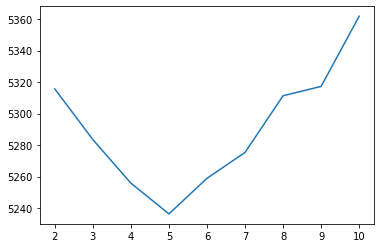

In [98]:
import matplotlib.pyplot as pt

pt.plot(range(2,11), scores)

In [ ]:
### 3.3 - Density estimation